# Exploratory Analyses

In [1]:
# import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('CleanData.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date']) 
# check
display(df.head())
display(df.info())

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Description,Date
0,536365,85123A,6,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00
1,536365,71053,6,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,2010-12-01 08:26:00
2,536365,84406B,8,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00
3,536365,84029G,6,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00
4,536365,84029E,6,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396069 entries, 0 to 397923
Data columns (total 8 columns):
InvoiceNo      396069 non-null int64
StockCode      396069 non-null object
Quantity       396069 non-null int64
UnitPrice      396069 non-null float64
CustomerID     396069 non-null float64
Country        396069 non-null object
Description    396069 non-null object
Date           396069 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 27.2+ MB


None

## Descriptive Statistics

In [3]:
display(df.describe(include='all'))

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Description,Date
count,396069.000000,396069,396069.000000,396069.00000,396069.000000,396069,396069,396069
unique,NaN,3659,NaN,NaN,NaN,35,3641,17160
top,NaN,85123A,NaN,NaN,NaN,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00
freq,NaN,2035,NaN,NaN,NaN,354005,2035,541
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-01 08:26:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-09 12:50:00
mean,560620.303871,NaN,13.050635,2.86758,15302.603362,NaN,NaN,NaN
std,13110.771502,NaN,180.802046,4.26512,1709.768762,NaN,NaN,NaN
min,536365.000000,NaN,1.000000,0.00000,12346.000000,NaN,NaN,NaN
25%,549196.000000,NaN,2.000000,1.25000,13975.000000,NaN,NaN,NaN


In [4]:
print('Total # of unique InvoiceNo:', df['InvoiceNo'].nunique())
print('Total # of unique CustomerID:', df['CustomerID'].nunique())

Total # of unique InvoiceNo: 18394
Total # of unique CustomerID: 4330


## Visualize the Entire Data

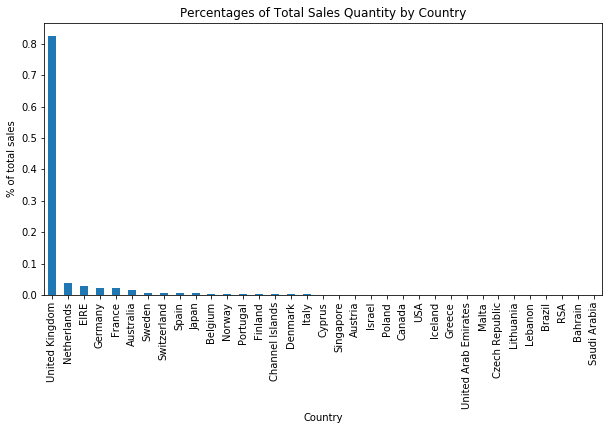

In [5]:
# total sales quantities by country
df_country = df.groupby('Country').sum()
df_country['Qpercent'] = df_country['Quantity']/df_country['Quantity'].sum()
df_country = df_country.sort_values(by=['Qpercent'], ascending=False)

# plot
df_country.plot.bar(y='Qpercent', figsize=(10,5))
plt.legend().remove()
plt.title('Percentages of Total Sales Quantity by Country')
plt.ylabel('% of total sales')
plt.show()

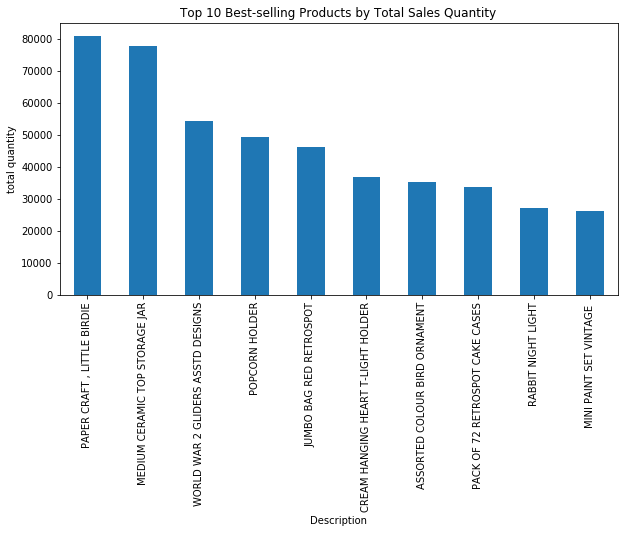

In [6]:
# total sales quantity by product
df_product = df.groupby('Description').sum()
df_product = df_product.sort_values(by=['Quantity'], ascending=False).head(10)

# plot top 10
df_product.plot.bar(y='Quantity', figsize=(10,5))
plt.legend().remove()
plt.title('Top 10 Best-selling Products by Total Sales Quantity')
plt.ylabel('total quantity')
plt.show()

## Create Subsample 
Create a subsample out of the original data where 
* the end date is 12/3/2011,
* item is popcorn holder.

In [7]:
# create subsample
df2 = df[df.Description=='POPCORN HOLDER']
df2['Day'] = df2['Date'].dt.normalize()
df2 = df2[df2['Day'] <= '2011-12-03']
# check
display(df2)
df2.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Description,Date,Day
219,536390,22197,100,0.72,17511.0,United Kingdom,POPCORN HOLDER,2010-12-01 10:19:00,2010-12-01
384,536404,22197,36,0.85,16218.0,United Kingdom,POPCORN HOLDER,2010-12-01 11:29:00,2010-12-01
523,536409,22197,2,0.85,17908.0,United Kingdom,POPCORN HOLDER,2010-12-01 11:45:00,2010-12-01
601,536412,22197,5,0.85,17920.0,United Kingdom,POPCORN HOLDER,2010-12-01 11:49:00,2010-12-01
794,536464,22197,5,0.85,17968.0,United Kingdom,POPCORN HOLDER,2010-12-01 12:23:00,2010-12-01
...,...,...,...,...,...,...,...,...,...
383144,580170,22197,1000,0.72,17949.0,United Kingdom,POPCORN HOLDER,2011-12-02 11:39:00,2011-12-02
383157,580176,22197,100,0.85,14292.0,United Kingdom,POPCORN HOLDER,2011-12-02 11:49:00,2011-12-02
383204,580188,22197,10,0.85,16440.0,United Kingdom,POPCORN HOLDER,2011-12-02 12:02:00,2011-12-02
384341,580309,22197,60,0.85,14503.0,United Kingdom,POPCORN HOLDER,2011-12-02 14:46:00,2011-12-02


(1030, 9)

## Visualize Subsample

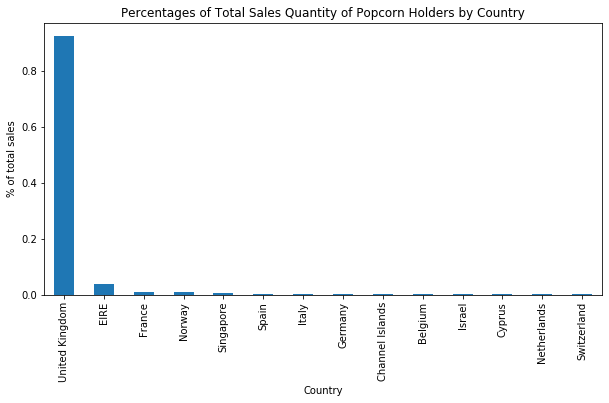

In [8]:
# total sales of top 3 best sellers by country
df_country = df2.groupby('Country').sum()
df_country['Qpercent'] = df_country['Quantity']/df_country['Quantity'].sum()
df_country = df_country.sort_values(by=['Qpercent'], ascending=False)

# plot
df_country.plot.bar(y='Qpercent', figsize=(10,5))
plt.legend().remove()
plt.title('Percentages of Total Sales Quantity of Popcorn Holders by Country')
plt.ylabel('% of total sales')
plt.show()

## Export Subsample

In [9]:
df2.to_csv('Subsample.csv')